Epoch 1: MSE = 0.3893977527932234
Epoch 2: MSE = 0.3869129903275809
Epoch 3: MSE = 0.3826119100330216
Epoch 4: MSE = 0.37662946131805247
Epoch 5: MSE = 0.3690905507406247
Epoch 6: MSE = 0.36013641760203924
Epoch 7: MSE = 0.3499482699564587
Epoch 8: MSE = 0.3387660039929232
Epoch 9: MSE = 0.32689867616843404
Epoch 10: MSE = 0.31472293321346645
Epoch 11: MSE = 0.3026665150387482
Epoch 12: MSE = 0.29117660471544404
Epoch 13: MSE = 0.2806768424858778
Epoch 14: MSE = 0.2715209306908412
Epoch 15: MSE = 0.2639530506435588
Epoch 16: MSE = 0.258084335911808
Epoch 17: MSE = 0.25389039418173615
Epoch 18: MSE = 0.2512290015971638
Epoch 19: MSE = 0.2498720374768182
Epoch 20: MSE = 0.24954329633721273
Epoch 21: MSE = 0.24995434973881242
Epoch 22: MSE = 0.2508331660065499
Epoch 23: MSE = 0.2519432865450394
Epoch 24: MSE = 0.2530938746286037
Epoch 25: MSE = 0.2541424161419691
Epoch 26: MSE = 0.2549923280982016
Epoch 27: MSE = 0.2555875514289655
Epoch 28: MSE = 0.25590572432172426
Epoch 29: MSE = 0.255

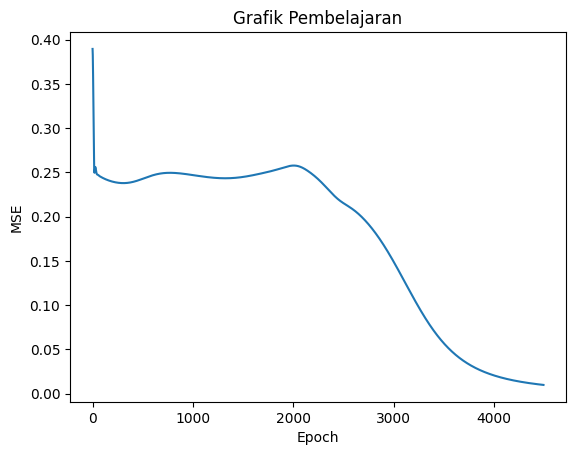

In [2]:
import numpy as np

# Fungsi aktivasi sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivatif dari fungsi sigmoid
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Inisialisasi bobot secara acak
def initialize_weights(input_size, hidden_size, output_size):
    W1 = np.random.randn(hidden_size, input_size)
    b1 = np.random.randn(hidden_size, 1)
    W2 = np.random.randn(output_size, hidden_size)
    b2 = np.random.randn(output_size, 1)

    weights = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return weights

# Fungsi feedforward
def feedforward(X, weights):
    W1 = weights["W1"]
    b1 = weights["b1"]
    W2 = weights["W2"]
    b2 = weights["b2"]

    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    activations = {"A1": A1, "A2": A2}
    return activations

# Fungsi backpropagation
def backpropagation(X, Y, activations, weights, learning_rate, momentum):
    A1 = activations["A1"]
    A2 = activations["A2"]
    W2 = weights["W2"]

    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / X.shape[1]
    db2 = np.mean(dZ2, axis=1, keepdims=True)

    dZ1 = np.dot(W2.T, dZ2) * sigmoid_derivative(A1)
    dW1 = np.dot(dZ1, X.T) / X.shape[1]
    db1 = np.mean(dZ1, axis=1, keepdims=True)

    # Update bobot dan bias dengan momentum
    dW2_prev = weights.get("dW2_prev", 0)
    db2_prev = weights.get("db2_prev", 0)
    dW1_prev = weights.get("dW1_prev", 0)
    db1_prev = weights.get("db1_prev", 0)

    dW2_prev = momentum * dW2_prev + (1 - momentum) * dW2
    db2_prev = momentum * db2_prev + (1 - momentum) * db2
    dW1_prev = momentum * dW1_prev + (1 - momentum) * dW1
    db1_prev = momentum * db1_prev + (1 - momentum) * db1

    weights["W2"] -= learning_rate * dW2_prev
    weights["b2"] -= learning_rate * db2_prev
    weights["W1"] -= learning_rate * dW1_prev
    weights["b1"] -= learning_rate * db1_prev

    weights["dW2_prev"] = dW2_prev
    weights["db2_prev"] = db2_prev
    weights["dW1_prev"] = dW1_prev
    weights["db1_prev"] = db1_prev

    return weights

# Fungsi untuk menghitung MSE
def compute_mse(X, Y, weights):
    activations = feedforward(X, weights)
    A2 = activations["A2"]
    mse = np.mean((A2 - Y) ** 2)
    return mse

# Algoritma pembelajaran
def train(X, Y, hidden_size, max_epoch, target_error, learning_rate, momentum):
    input_size = X.shape[0]
    output_size = Y.shape[0]

    weights = initialize_weights(input_size, hidden_size, output_size)
    epoch = 0
    mse = float("inf")
    mse_history = []

    while epoch < max_epoch and mse > target_error:
        epoch += 1
        mse = 0

        for i in range(X.shape[1]):
            x = X[:, i].reshape(-1, 1)
            y = Y[:, i].reshape(-1, 1)

            activations = feedforward(x, weights)
            weights = backpropagation(x, y, activations, weights, learning_rate, momentum)

            mse += compute_mse(x, y, weights)

        mse /= X.shape[1]
        mse_history.append(mse)

        print("Epoch {}: MSE = {}".format(epoch, mse))

    return weights, mse_history

# Contoh penggunaan
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])
Y = np.array([[0, 1, 1, 0]])

hidden_size = 3
max_epoch = 10000
target_error = 0.01
learning_rate = 0.1
momentum = 0.97

weights, mse_history = train(X, Y, hidden_size, max_epoch, target_error, learning_rate, momentum)

# Prediksi
activations = feedforward(X, weights)
predictions = np.round(activations["A2"])
print("Prediksi: {}".format(predictions))

# Plot grafik pembelajaran
import matplotlib.pyplot as plt

plt.plot(range(len(mse_history)), mse_history)
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("Grafik Pembelajaran")
plt.show()
